## Install Spotipy

In [ ]:
%pip install spotipy

## Import packages and loggin credentials

In [14]:
import spotipy
import requests
import pandas as pd
import config

from spotipy.oauth2 import SpotifyClientCredentials

#input loggin credientials using config file containing credentials
client_credentials_manager = SpotifyClientCredentials(client_id =config.client_id, client_secret = config.client_secret)

#create instance w/loggin credentials
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [535]:
import time
import numpy as np

## Set up loggin credentials under "sp" instance

In [ ]:
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id =config.client_id, client_secret = config.client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Code to look at one account's playlists

In [28]:


playlists = sp.user_playlists('nma320')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

   1 spotify:playlist:458lCP20Pqvxx1OQ6BFiYb Project 3 - Hip Hop


## Playlist and Username Information - IGNORE

In [172]:
playlist_url = 'https://open.spotify.com/playlist/458lCP20Pqvxx1OQ6BFiYb'
username = 'nma320'
playlist_id = '458lCP20Pqvxx1OQ6BFiYb'

## Explore Playlist Tracks

In [98]:
dict1 = sp.user_playlist_tracks('nma320', playlist_id = '458lCP20Pqvxx1OQ6BFiYb')

In [99]:
# what are the keys of the dictionary
dict1.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [125]:
#number of tracks in the playlist
dict1['total'] 

161

In [104]:
# what are the keys of the 'items' dictionary?
dict1['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [112]:
#what are the keys in the track dictionary?
dict1['items'][0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [118]:
dict1['items'][0]['track']['name'] # Track name
dict1['items'][0]['track']['id']   # Track ID

'Full Clip'

In [223]:
dict1['items'][3]['track']['artists'][0]['name']

'Ice Cube'

# Helper Functions

1) song_ids

2) song_names

3) song_artists

#### Features and Analysis

4) song_features

In [196]:
def song_ids():
    
    dict1 = sp.user_playlist_tracks('nma320', playlist_id = '458lCP20Pqvxx1OQ6BFiYb')
    ids = []
    for offset1 in range(0, dict1['total'], 100):
        
        dict1 = sp.user_playlist_tracks('nma320', playlist_id = '458lCP20Pqvxx1OQ6BFiYb', offset = offset1)
        
        [ids.append(song_info['track']['id']) for song_info in dict1['items']]
        time.sleep(0.35)
    return ids

len(song_ids())

1410

In [197]:
def song_names():
    
    dict1 = sp.user_playlist_tracks('nma320', playlist_id = '458lCP20Pqvxx1OQ6BFiYb')
    names = []

    for offset1 in range(0, dict1['total'], 100):
        
        dict1 = sp.user_playlist_tracks('nma320', playlist_id = '458lCP20Pqvxx1OQ6BFiYb', offset = offset1)
        
        [names.append(song_info['track']['name']) for song_info in dict1['items']]
        time.sleep(0.35)
    return names
# song_names()

In [224]:
def song_artist():
    
    dict1 = sp.user_playlist_tracks('nma320', playlist_id = '458lCP20Pqvxx1OQ6BFiYb') #dictionary to access user playlist
    artists = [] # create container

    for offset1 in range(0, dict1['total'], 100):  
        #offset1 will change with each loop until exceeding dict['total']
        
        dict1 = sp.user_playlist_tracks('nma320', playlist_id = '458lCP20Pqvxx1OQ6BFiYb', offset = offset1)
        #offset changes by 100 with each iteration
        
        [artists.append(song_info['track']['artists'][0]['name']) for song_info in dict1['items']]
        #list comprehension to append artist names
        time.sleep(0.35)
        #pause the loop for .35 seconds to avoid overloading API
    return artists

## Features and Analysis

In [ ]:
#type, uri, track_href, analysis_url

In [246]:
def song_features():
    feats = [] #create a container
    
    for i in range(0, len(song_ids()), 50):
        feats.extend(sp.audio_features(tracks = song_ids()[i:i+50]))    
        time.sleep(.35)
#     for dictionary in feats:
#         del dictionary['type']
#         del dictionary['uri']
#         del dictionary['track_href']
#         del dictionary['analysis_url']
    return feats
# song_features()

In [176]:
sp.audio_analysis(song_ids()[0])

{'meta': {'analyzer_version': '4.0.0',
  'platform': 'Linux',
  'detailed_status': 'OK',
  'status_code': 0,
  'timestamp': 1444613642,
  'analysis_time': 9.46059,
  'input_process': 'libvorbisfile L+R 44100->22050'},
 'track': {'num_samples': 4775936,
  'duration': 216.59574,
  'sample_md5': '',
  'offset_seconds': 0,
  'window_seconds': 0,
  'analysis_sample_rate': 22050,
  'analysis_channels': 1,
  'end_of_fade_in': 0.0,
  'start_of_fade_out': 208.97959,
  'loudness': -5.885,
  'tempo': 95.224,
  'tempo_confidence': 0.666,
  'time_signature': 4,
  'time_signature_confidence': 1.0,
  'key': 1,
  'key_confidence': 0.696,
  'mode': 1,
  'mode_confidence': 0.422,
  'codestring': 'eJxVm9eBJDcMRFOZEOhN_onpveLs7uk-pCWnDQkChYLpOUftvY77KZ9aVtvjrN4_d31ambOWupi_7bPumbP1cj-zts_lotFXvZ-zBveNVu-t1z_b-Fzua3u186l1tk8_da562vzUsZvPPbfPysWbB99S716jbX445XPvKXst3tFGKZ-x-zltsIi2G7-u28e6937aHbyos-A1WEYvo_CiMu45_NC7L991nM1O-uLBffZ-1pnnw3PdayurXPb0Ge0c9lFOu4X98bLD8yaraovh5VFrNRZ2-vrMNrhYUazDMmZ2dErePD5zs9LB

In [177]:
sp.audio_analysis(song_ids()[0]).keys()

#delete meta

dict_keys(['meta', 'track', 'bars', 'beats', 'tatums', 'sections', 'segments'])

In [179]:
sp.audio_analysis(song_ids()[0])['track']

{'num_samples': 4775936,
 'duration': 216.59574,
 'sample_md5': '',
 'offset_seconds': 0,
 'window_seconds': 0,
 'analysis_sample_rate': 22050,
 'analysis_channels': 1,
 'end_of_fade_in': 0.0,
 'start_of_fade_out': 208.97959,
 'loudness': -5.885,
 'tempo': 95.224,
 'tempo_confidence': 0.666,
 'time_signature': 4,
 'time_signature_confidence': 1.0,
 'key': 1,
 'key_confidence': 0.696,
 'mode': 1,
 'mode_confidence': 0.422,
 'codestring': 'eJxVm9eBJDcMRFOZEOhN_onpveLs7uk-pCWnDQkChYLpOUftvY77KZ9aVtvjrN4_d31ambOWupi_7bPumbP1cj-zts_lotFXvZ-zBveNVu-t1z_b-Fzua3u186l1tk8_da562vzUsZvPPbfPysWbB99S716jbX445XPvKXst3tFGKZ-x-zltsIi2G7-u28e6937aHbyos-A1WEYvo_CiMu45_NC7L991nM1O-uLBffZ-1pnnw3PdayurXPb0Ge0c9lFOu4X98bLD8yaraovh5VFrNRZ2-vrMNrhYUazDMmZ2dErePD5zs9LBdWvvya-HJ1-WzC5K_6zCvQqLV9e5P6v5psN2Z52f5X4Pjxp1XX50v2POi2xZ_jp1fUafPKOxpV24dQzWvDm8z64srbc5zuXUPtvtn17n7BzPHnMhuXPXHL189t7rK7ky9ucoDQ59lIlIPr7909jfPpetnV2Q5ujoyPLi--Ra0YTN0fHgsxs_34HONG51ewWpI1f2HYWo7bSq0szI73B52Vx-uHtzNLsjLcTELasi81FP577KMvvpkw

In [194]:
sp.audio_analysis(song_ids()[0])['beats']

[{'start': 0.58373, 'duration': 0.63474, 'confidence': 1.0},
 {'start': 1.21847, 'duration': 0.62347, 'confidence': 0.945},
 {'start': 1.84194, 'duration': 0.62748, 'confidence': 0.855},
 {'start': 2.46942, 'duration': 0.62782, 'confidence': 0.914},
 {'start': 3.09724, 'duration': 0.62446, 'confidence': 0.897},
 {'start': 3.72171, 'duration': 0.62896, 'confidence': 0.947},
 {'start': 4.35066, 'duration': 0.63065, 'confidence': 0.884},
 {'start': 4.98132, 'duration': 0.62954, 'confidence': 0.914},
 {'start': 5.61085, 'duration': 0.63123, 'confidence': 0.766},
 {'start': 6.24209, 'duration': 0.62676, 'confidence': 0.761},
 {'start': 6.86884, 'duration': 0.63239, 'confidence': 0.707},
 {'start': 7.50123, 'duration': 0.63241, 'confidence': 0.901},
 {'start': 8.13365, 'duration': 0.62907, 'confidence': 0.788},
 {'start': 8.76272, 'duration': 0.62854, 'confidence': 0.713},
 {'start': 9.39126, 'duration': 0.63025, 'confidence': 0.554},
 {'start': 10.02151, 'duration': 0.62972, 'confidence': 0

In [ ]:
# mean aggregate durations of beats & confidence
# mean aggregate durations of tatums & confidence

#### analysis features

start, duration, confidence

In [ ]:
# danceability, energy, key, loudness, mode, acousticness, instrumentalness, liveness, valence, tempo, duration_ms

# DROP type, uri, track_href, analysis_url, time

# Running Function to grab IDs, Names, and Artists

### Then convert to Pandas and Download as CSV

In [216]:
ids = song_ids()
names = song_names()
artists = song_artist()

1410

In [229]:
df1_info = {'ids': ids, 'names': names, 'artists': artists} # create dictionary for dataframe
df1 = pd.DataFrame.from_dict(df1_info) # create dataframe
df1.to_csv('df1_info.csv', index = None, header=True) # save DataFrame as a CSV

# Run Function to grab Features

In [247]:
feats = song_features()

In [295]:
feats
feats = list(filter(None, feats)) # remove None value dictionary

In [400]:
df2 = pd.DataFrame(feats)
df2.drop(columns = ['track_href', 'type', 'uri', 'analysis_url'], inplace = True)
df2.set_index('id', inplace = True)

# Create Speechiness Classification Column

In [320]:
len(df2[df2['speechiness']<0.33]) # checking lens
#music

1077

In [365]:
len(df2[df2['speechiness']>0.66]) # checking lens
#pure speech

23

In [331]:
len(df2[(df2['speechiness'] >= 0.33) & (df2['speechiness'] <= 0.66)]) # checking lens

309

In [401]:
def speechify(df2):
    #speechiness < 0.33 --> 'musical'
    df2.loc[df2['speechiness'] < 0.33, "SPEECH"] = 'musical'

    #speechiness >= 0.33 --> 'speechy'
    df2.loc[df2['speechiness'] >= 0.33, "SPEECH"] = 'speechy' 

speechify(df2)

df2.SPEECH.nunique() #testing to see if all lines of code ran

2

In [405]:
len(df2[df2['speechiness'] >= 0.33]) #testing for 'pure'

332

In [376]:
df2[(df2['speechiness'] < 0.33)] #testing to for 'musical'

In [378]:
df2[(df2['speechiness'] >= 0.33) & (df2['speechiness'] <= 0.66)] #testing for 'speechy'

# Create dummy variables

key, mode, time_signature

In [416]:
df2 = pd.get_dummies(df2, columns = ['key', 'mode', 'time_signature'])

In [432]:
df2 = pd.get_dummies(df2, 'SPEECH')
df2

In [512]:
df2.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_0',
       'mode_1', 'time_signature_0', 'time_signature_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5', 'SPEECH_musical',
       'SPEECH_speechy'],
      dtype='object')

### steps 

1) create graphs to visualize how data interacts with one another

2) scale

3) train test split

4) run models


In [513]:
df2.to_csv('df2_info.csv') # save DataFrame as a CSV

# EDA - looking at how data interacts with output

In [417]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import seaborn as sns

In [407]:
# bar graph, confusion matrix, histogram


#kde, and frequency distribution

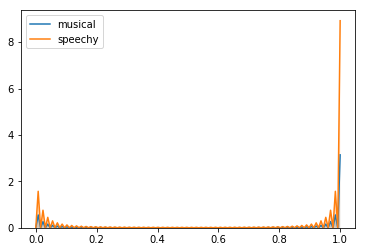

In [503]:
# distribution of SPEECHINESS over time_signature_5

sns.kdeplot(df2[['time_signature_5', 'SPEECH_musical']][df2['SPEECH_musical'] == 1]['time_signature_5'], shade = True, label="musical")
sns.kdeplot(df2[['time_signature_5', 'SPEECH_musical']][df2['SPEECH_musical'] == 0]['time_signature_5'], shade = True, label="speechy")

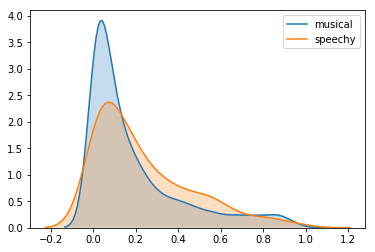

In [502]:
# distribution of SPEECHINESS over acousticness

sns.kdeplot(df2[['acousticness', 'SPEECH_musical']][df2['SPEECH_musical'] == 1]['acousticness'], shade = True, label="musical")
sns.kdeplot(df2[['acousticness', 'SPEECH_musical']][df2['SPEECH_musical'] == 0]['acousticness'], shade = True, label="speechy")

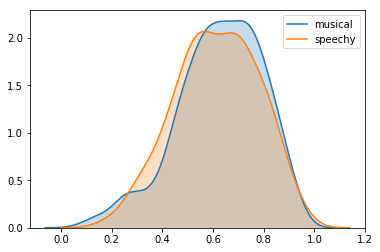

In [508]:
# distribution of SPEECHINESS over energy

sns.kdeplot(df2[['energy', 'SPEECH_musical']][df2['SPEECH_musical'] == 1]['energy'], shade = True, label="musical")
sns.kdeplot(df2[['energy', 'SPEECH_musical']][df2['SPEECH_musical'] == 0]['energy'], shade = True, label="speechy")

In [ ]:
plt.

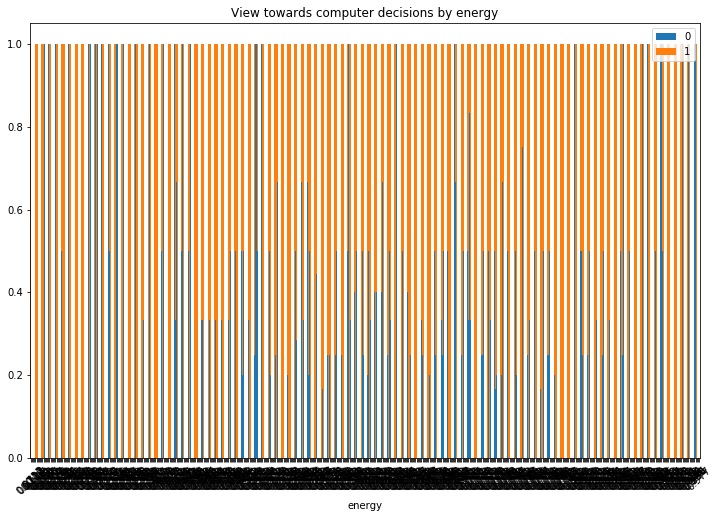

In [544]:
def stacked_bar(var_1, var_2):
    x = df2.groupby(var_1)[var_2].value_counts(normalize=True).unstack()
    x.plot(kind='bar', stacked='True', figsize=(12,8))
    plt.legend(loc=1)
    plt.title("View towards computer decisions by "+ var_1)
    plt.xticks(rotation=45)
    plt.show();
    
stacked_bar('energy', 'SPEECH_musical')

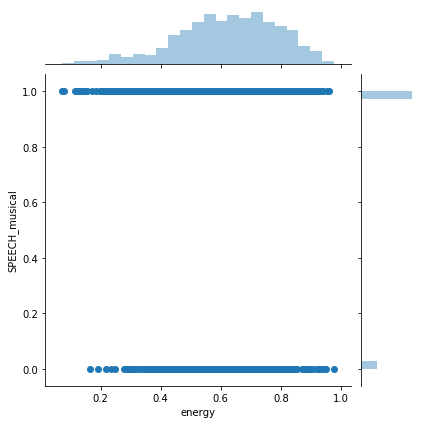

In [518]:
sns.jointplot(x='energy', y='SPEECH_musical', data=df2);


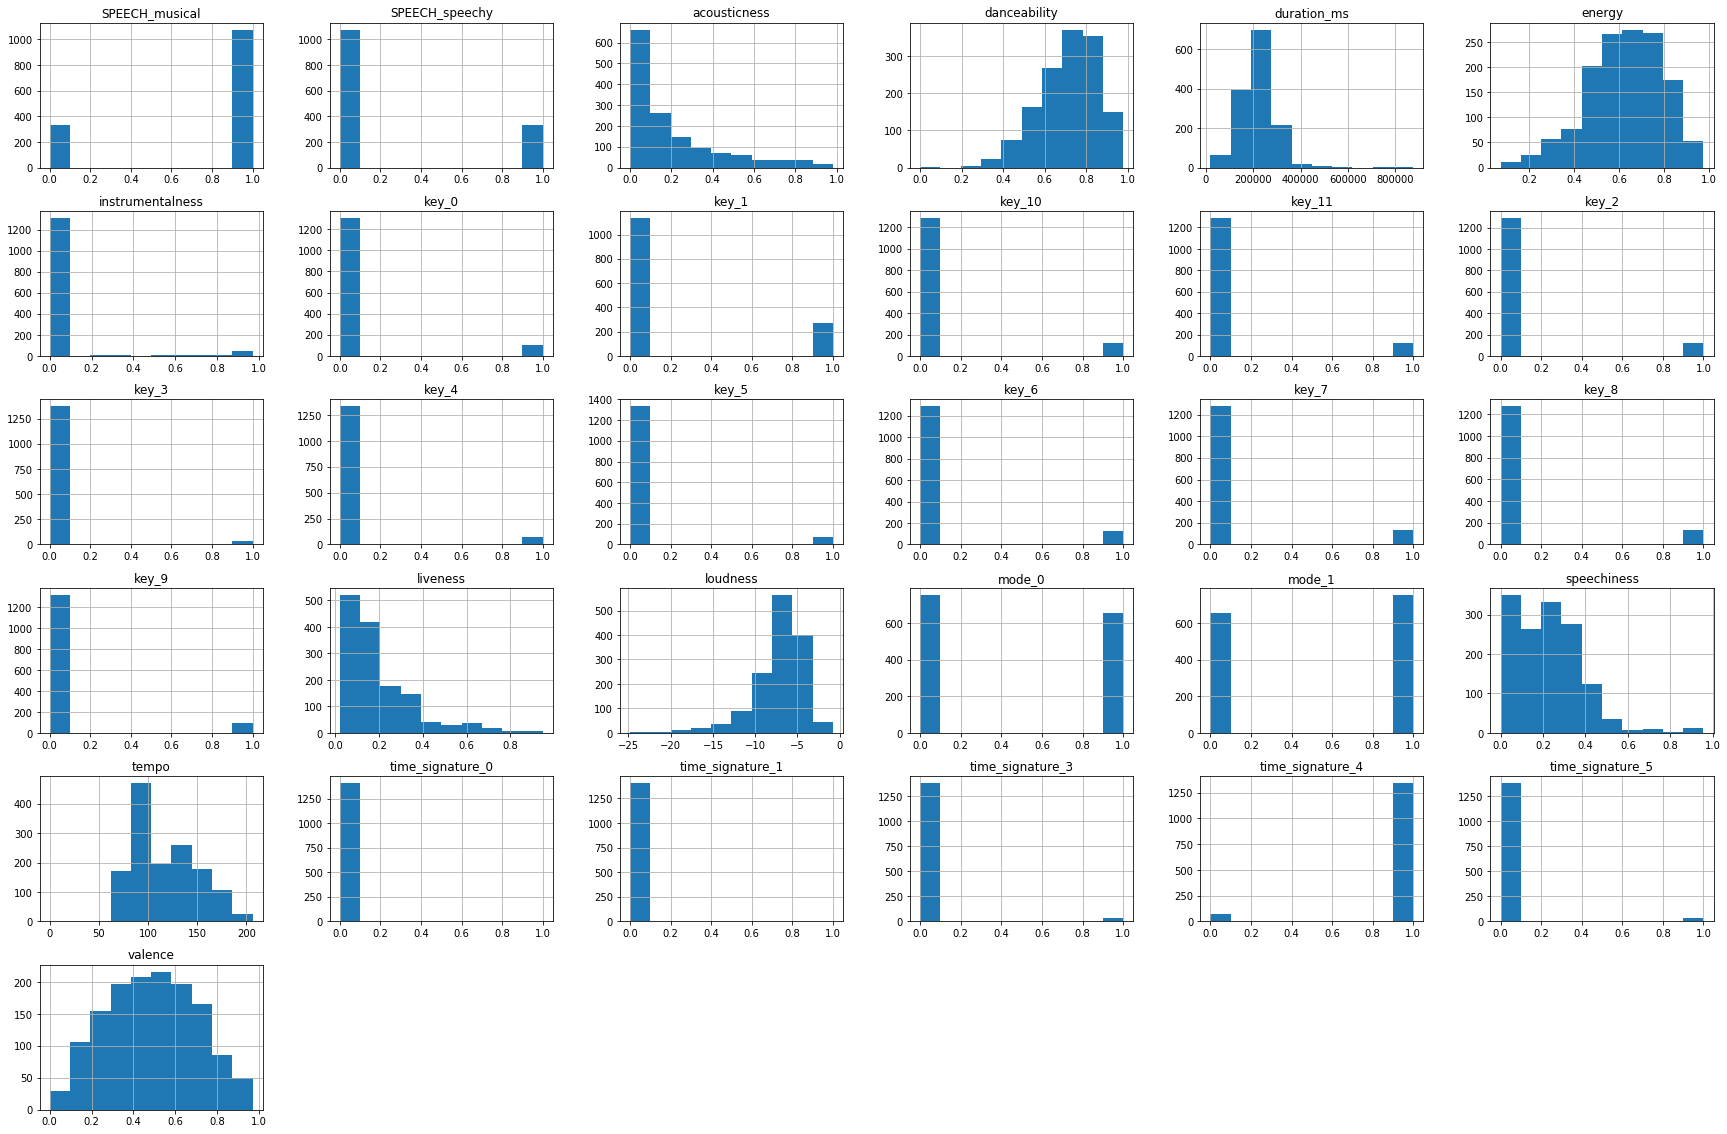

In [525]:
df2.hist(figsize = (30,20))
plt.show()

In [517]:
# def kde_maker(features, df):
    
#     x = 
#     y = 
    
#     fig, ax = plt.subplot(nrows = 4, ncols = 4)
    
#     for row in ax:
#         for col in row:
    
#     for feature in features:
#         sns.kdeplot(df[[feature, 'SPEECH_musical']][df['SPEECH_musical'] == 1][feature], shade = True, label="musical")
#         sns.kdeplot(df[[feature, 'SPEECH_musical']][df['SPEECH_musical'] == 0][feature], shade = True, label="speechy")
# kde_maker(features, df2)

# Trying to get Hannah's code to work

In [450]:
features = list(df2.columns)
# features.remove('SPEECH')
features.remove('speechiness')
features.remove('SPEECH_speechy')
features.remove('SPEECH_musical')

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


TypeError: 'AxesSubplot' object is not callable

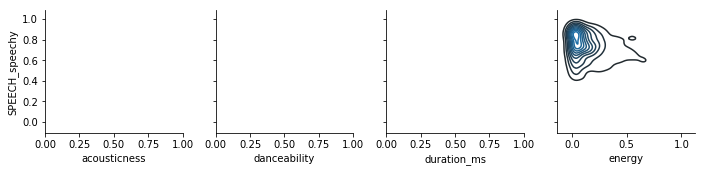

In [506]:
# sns.PairGrid(df2,
#            x_vars = ['acousticness', 'danceability', 'duration_ms', 'energy'],#features[i:i+4],
#            y_vars = ["SPEECH_speechy"]).map(sns.kdeplot(df2, shade = False))

In [451]:
features

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'tempo',
 'valence',
 'key_0',
 'key_1',
 'key_2',
 'key_3',
 'key_4',
 'key_5',
 'key_6',
 'key_7',
 'key_8',
 'key_9',
 'key_10',
 'key_11',
 'mode_0',
 'mode_1',
 'time_signature_0',
 'time_signature_1',
 'time_signature_3',
 'time_signature_4',
 'time_signature_5']

In [481]:
df2['SPEECH_speechy'] = df2['SPEECH_speechy'].astype('int64')

In [482]:
df2['SPEECH_speechy'].dtype

dtype('int64')

In [510]:
for i in range(0, len(features[:3]), 4):
    print(features[i:i+4])
    g = sns.PairGrid(df2,
           x_vars = ['acousticness', 'danceability', 'duration_ms', 'energy'],#features[i:i+4],
           y_vars = ["SPEECH_speechy"])
    g = g.map(sns.kdeplot(df2, shade = False))

In [511]:
g = sns.PairGrid(df2,
           x_vars = features,
           y_vars = ["SPEECH_speechy"])
g = g.map(sns.kdeplot(df2, shade=False))

In [509]:
for i in range(0, 13, 4):
    g = sns.PairGrid(df2,
           x_vars = features[i:i+4],
           y_vars = ["SPEECH_speechy"])
    g = g.map(sns.kdeplot(df2.energy, df2.SPEECH_speechy, shade = False))

# Testing Models

# Data Visualiziation Tools

In [ ]:
# ROC, AUC, Confusion matrix

# Archived Code

In [289]:
dummy = []
for dictionary in list(filter(None, feats)):
    dummy.append(dictionary['track_href'])
len(dummy)

KeyError: 'track_href'

In [278]:
feats[1]

{'danceability': 0.778,
 'energy': 0.578,
 'key': 9,
 'loudness': -7.22,
 'mode': 0,
 'speechiness': 0.274,
 'acousticness': 0.432,
 'instrumentalness': 0,
 'liveness': 0.138,
 'valence': 0.758,
 'tempo': 84.487,
 'id': '2g8HN35AnVGIk7B8yMucww',
 'duration_ms': 252747,
 'time_signature': 4}

In [276]:
feats[0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'duration_ms', 'time_signature'])

In [293]:
dummy = []
for dictionary in list(filter(None, feats)):
    if dictionary == None:
        dummy.append(dictionary)
        
len(feats)

1410